In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Load in images

In [2]:
images = torch.load('../data/images.pt')
true_counts = torch.load('../data/true_counts.pt')
true_locs = torch.load('../data/true_locs.pt')
true_fluxes = torch.load('../data/true_fluxes.pt')

num_counts = true_counts.max().item() + 1  # |{0,1,2,...,max_count}|

In [3]:
image_dim = images.shape[1]
image_index = 140

grid_interval = image_dim // 4
outer_min = 0 - 0.5
outer_max = image_dim - 0.5
pad = 2

cmap = 'gray'
linewidth = 2
pad_color1 = 'darkorange'
pad_color2 = 'darkorange'

### Illustrate tiling

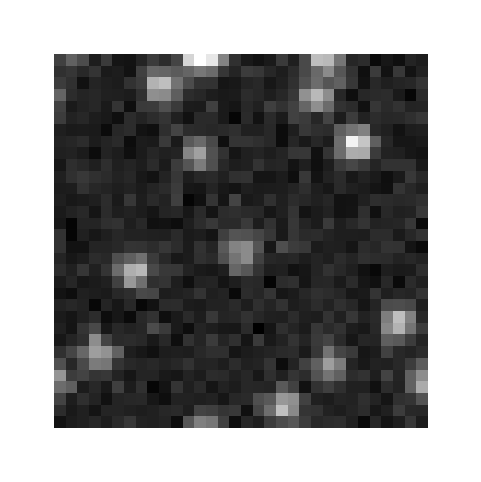

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)

# fig.savefig('figures/image32x32_noborders.png', dpi = 250, transparent = True)

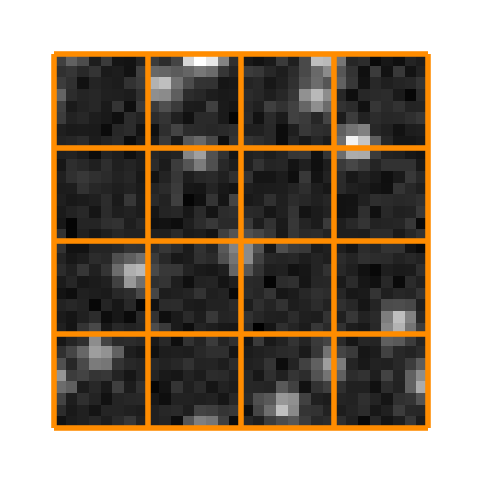

In [5]:
# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in range(5)],
              ymin = outer_min, ymax = outer_max,
              color = pad_color1, linewidth = 2 * linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in range(5)],
              xmin = outer_min, xmax = outer_max,
              color = pad_color1, linewidth = 2 * linewidth)

# fig.savefig('figures/image32x32_tiles.png', dpi = 250, transparent = True)
fig

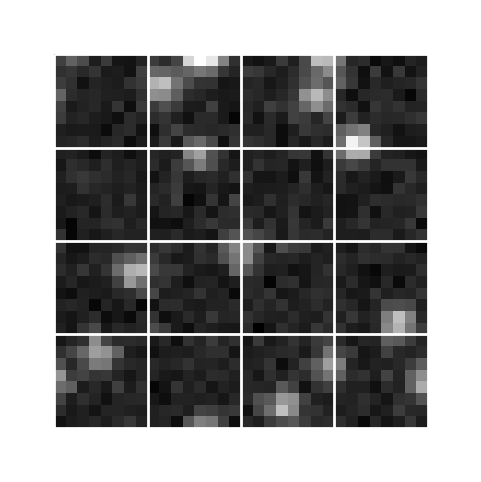

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)

_ = ax.vlines(x = [c * grid_interval - 0.5 for c in range(5)],
              ymin = outer_min, ymax = outer_max,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in range(5)],
              xmin = outer_min, xmax = outer_max,
              color = 'white', linewidth = linewidth)

# fig.savefig('figures/image32x32_whitetiles.png', dpi = 250, transparent = True)

### Demonstrate divide-and-conquer procedure

##### 16 tiles

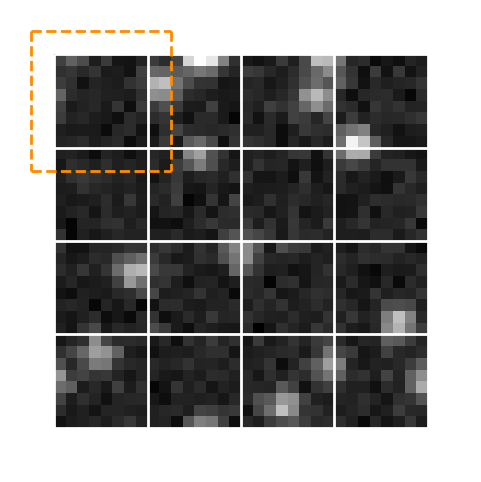

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in range(5)],
              ymin = outer_min, ymax = outer_max,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in range(5)],
              xmin = outer_min, xmax = outer_max,
              color = 'white', linewidth = linewidth)

# padding
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_tile1.png', dpi = 250, transparent = True)

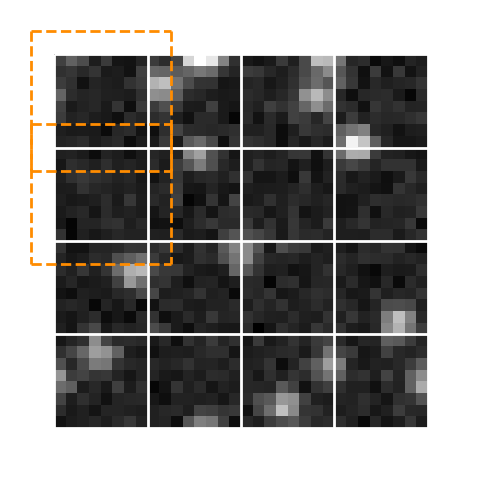

In [8]:
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              ymin = 1 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [1 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_tile2.png', dpi = 250, transparent = True)
fig

##### 8 pairs

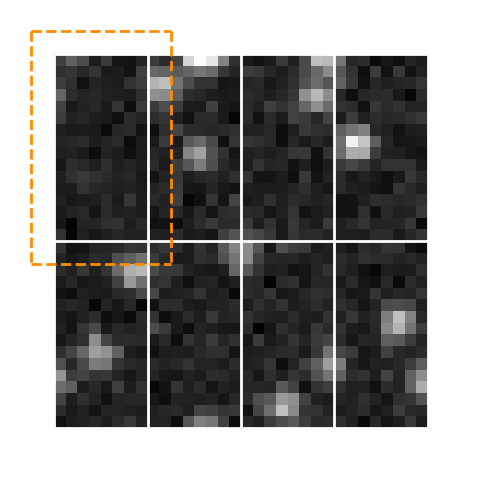

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in range(5)],
              ymin = outer_min, ymax = outer_max,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,2,4]],
              xmin = outer_min, xmax = outer_max,
              color = 'white', linewidth = linewidth)

# padding
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_pair1.png', dpi = 250, transparent = True)

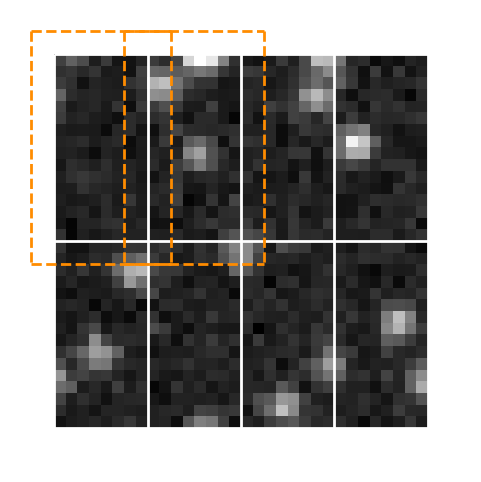

In [10]:
_ = ax.vlines(x = [1 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 1 * grid_interval - pad - 0.5, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_pair2.png', dpi = 250, transparent = True)
fig

##### 4 quadrants

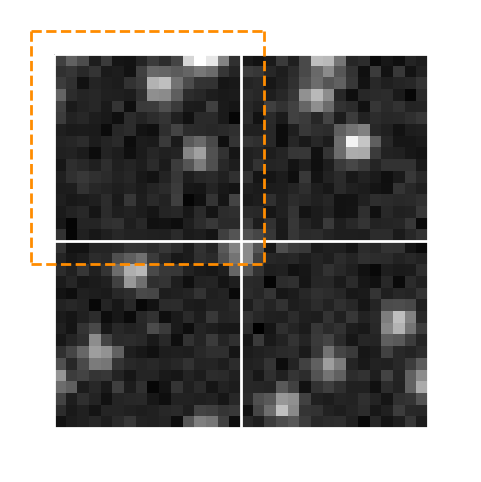

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,2,4]],
              ymin = outer_min, ymax = outer_max,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,2,4]],
              xmin = outer_min, xmax = outer_max,
              color = 'white', linewidth = linewidth)

# padding
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_quadrant1.png', dpi = 250, transparent = True)

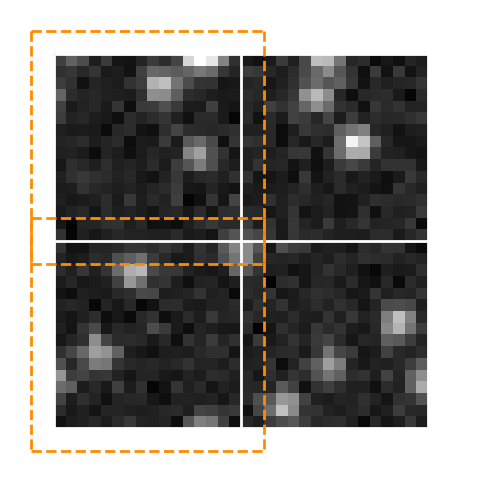

In [12]:
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = 2 * grid_interval - pad - 0.5, ymax = 4 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [2 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_quadrant2.png', dpi = 250, transparent = True)
fig

##### 2 halves

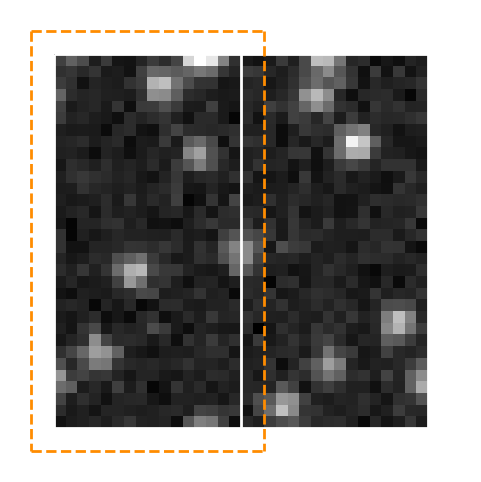

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)

_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth)

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,2,4]],
              ymin = outer_min, ymax = outer_max,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,4]],
              xmin = outer_min, xmax = outer_max,
              color = 'white', linewidth = linewidth)

# padding
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_half1.png', dpi = 250, transparent = True)

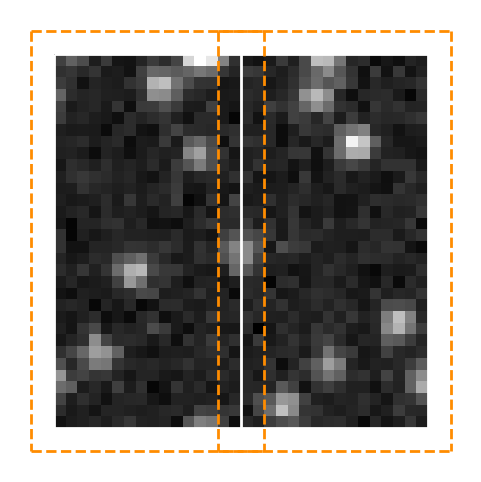

In [14]:
_ = ax.vlines(x = [2 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = 2 * grid_interval - pad - 0.5, xmax = 4 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_half2.png', dpi = 250, transparent = True)
fig

##### 1 image

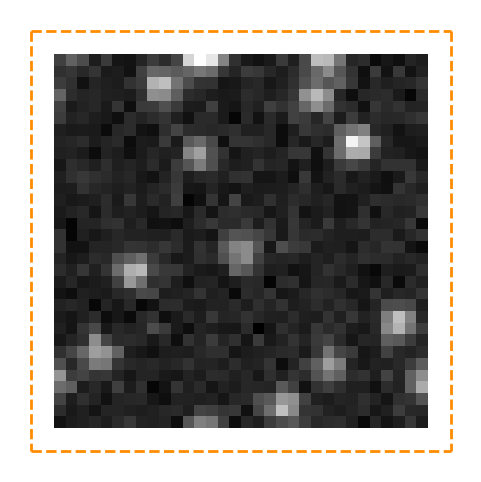

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,4]],
              ymin = outer_min, ymax = outer_max,
              color = 'white', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,4]],
              xmin = outer_min, xmax = outer_max,
              color = 'white', linewidth = linewidth, alpha = 0)

# padding
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = 'dashed', linewidth = linewidth)

# fig.savefig('figures/image32x32_image1.png', dpi = 250, transparent = True)

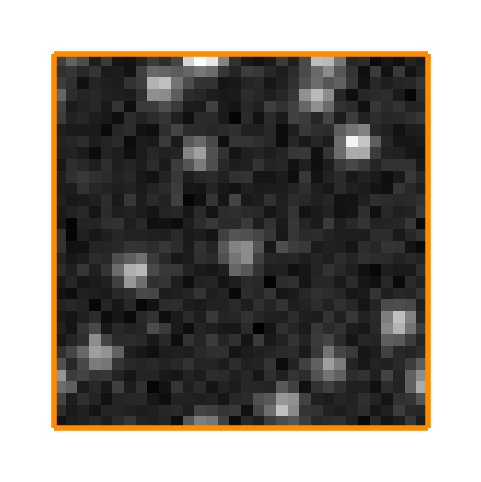

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index], cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,4]],
              ymin = outer_min, ymax = outer_max,
              color = pad_color1, linewidth = 2 * linewidth, linestyles = 'solid')
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,4]],
              xmin = outer_min, xmax = outer_max,
              color = pad_color1, linewidth = 2 * linewidth, linestyles = 'solid')

# padding
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              ymin = outer_min - pad, ymax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 4 * grid_interval + pad - 0.5],
              xmin = outer_min - pad, xmax = 4 * grid_interval + pad - 0.5,
              color = 'white', linestyles = 'dashed', linewidth = linewidth, alpha = 0)

# fig.savefig('figures/image32x32_image2.png', dpi = 250, transparent = True)